In [1]:
import json
import os
import boto3
from pprint import pprint
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
BUCKET_NAME = 'modin-jenkins-result'

In [53]:
# Connect to s3
s3 = boto3.resource('s3')
client = boto3.client('s3')

# Get list of folders in Bucket
response = client.list_objects(
    Bucket=BUCKET_NAME,
)

# Filter for folders containing perf data for commits merged into master
# use commented out function eventually, just use this for now:
master_commit_keys = [a['Key'] for a in response['Contents'] if "-perf" in a['Key']]
#master_commit_keys = [a['Key'] for a in response['Contents'] if "-perf-COMMIT" in a['Key']]
pprint(master_commit_keys)

['07d2f5c-perf/0001_07d2f5c0926897b0998655a27eceb09d2260b825_20181031_142612.json',
 '081a16e-perf/0001_081a16ef4872a935ab0eb455063fd4b73efd85d0_20181110_011213.json',
 '0a9d8f2-perf/0001_0a9d8f2459d1b8c96f7f5fa18357f5c2cf2f12e2_20181108_224903.json',
 '0c47ac5-perf/0001_0c47ac59fccd02b38ce5a50828f25bf7c46eaf07_20181107_205803.json',
 '17c848b-perf/0001_17c848ba53cb49225d9c4a48cc17ab12c7cb08b5_20181101_225622.json',
 '2bebec7-perf/0001_2bebec7eba12c72a7aef749f84f031028caa7a52_20181104_030944.json',
 '2df3b70-perf/0001_2df3b707081d6451bda06c19479087b00d81d138_20181110_010924.json',
 '2ea3882-perf/0001_2ea388278047aab242140252b9f43579f5caac11_20181109_233925.json',
 '2f2df55-perf/0001_2f2df551aa48bdcae45f36b045aeeaf59bab9af2_20181109_235904.json',
 '3000f20-perf-PR/0001_3000f20a70bf0fe4fb63b07e917781e81df2e65e_20181110_010654.json',
 '330bb5d-perf/0001_330bb5dbb7ea2412311023f336b3d68920c77a99_20181104_154809.json',
 '3b54350-perf/0001_3b543508df92928da54f8eeb6c36ec96acf11358_20181107_151

In [42]:
# Fetch the Perf Data from S3 Bucket
perf_data = []
for key in master_commit_keys:
    response = client.get_object(
        Bucket=BUCKET_NAME,
        Key=key
    )
    file_str = response['Body'].read()
    # Convert the Data to JSON Object before storing
    file_json = json.loads(file_str)
    perf_data.append(file_json)

In [49]:
def json_parser(data):
    """
    This function parses the a single performance json file.
    Args:
        data: json file corresponding to perf data for one commit

    Returns:
        commit_hash: hash of the commit for this file
        commit_order: order of the commit from earliest to latest
        test_data: parsed performance data for each test run in the suite
    """
    commit_hash = commit_data["commit_info"]["id"]
    commit_order = commit_data["commit_info"]["commit_number"]
    test_data = {}
    for test in commit_data["benchmarks"]:
        name = test["name"][5:]
        test_data[name] = test["stats"]["mean"]
    return commit_hash, commit_order, test_data

In [51]:
all_commits_data = {}
commit_orders = {}
i = 0

# Loops through all the Perf Data files and gets the parsed data
for commit_data in perf_data:
    # use commented one later and get rid of the i lines
    # commit_hash, commit_order, data = json_parser(commit_data)
    commit_hash, i, data = json_parser(commit_data)
    all_commits_data[commit_hash] = data
    commit_orders[commit_order] = commit_hash
    i += 1
    
all_commits_data

{'07d2f5c0926897b0998655a27eceb09d2260b825': {'sum': 0.3019047006033361,
  'fillna': 0.0040937843269135046,
  'add': 0.07463556513386338,
  'add_df': 0.3864250261802226,
  'describe': 0.040984798595309256,
  'isna': 0.030530467472114676},
 '081a16ef4872a935ab0eb455063fd4b73efd85d0': {'sum': 0.18005509525537491,
  'fillna': 0.0033341860163862967,
  'add': 0.0726565016576877,
  'add_df': 0.2109815612435341,
  'describe': 0.03368481621146202,
  'isna': 0.02411423464555566},
 '0a9d8f2459d1b8c96f7f5fa18357f5c2cf2f12e2': {'sum': 0.3397513003554195,
  'fillna': 0.004069332585025292,
  'add': 0.06381286646549901,
  'add_df': 0.3714570229873061,
  'describe': 0.04264999685498575,
  'isna': 0.03183635920697056},
 '0c47ac59fccd02b38ce5a50828f25bf7c46eaf07': {'sum': 0.16721800776819387,
  'fillna': 0.0033539226552581087,
  'add': 0.07179773865001542,
  'add_df': 0.22119777463376522,
  'describe': 0.0332213720040662,
  'isna': 0.024518635714562927},
 '17c848ba53cb49225d9c4a48cc17ab12c7cb08b5': {'su

In [2]:
json_dir = os.getcwd() + "/modin/.benchmarks/Darwin-CPython-3.6-64bit/"
master_hash = "ae9f397109620cf00243169654f2f4bec7809b72"

data = []
commit_order = {}
master_data = []
for filename in os.listdir(json_dir):
    if filename.endswith(".json"):
        order = int(filename.split("_")[0])
        commit = filename.split("_")[1].split("_")[0]
        if commit == master_hash:
            with open(json_dir + filename) as f:
                master_data.append(json.load(f))
        else:
            commit_order[order] = commit
            with open(json_dir + filename) as f:
                data.append(json.load(f))
            
#commit_order = OrderedDict(sorted(commit_order.items(), key=lambda t: t))
commit_order


{1: 'a368735324669914efcd9020ac3c8ffffab9b641',
 3: '41dbd5e0c89baf4a42aaa50f924e213feda37e6c',
 2: 'e071b337e6162422d9d64e5c9a865cd3ae1f65cc',
 6: 'efe027c9b5a640889c1dc61fd85619dc7c07462a',
 5: '1080060228263b837204c89e5f78ceddd697a448',
 4: 'c6f89afe235a23233267dfbe1f4e0267b1446ea5'}

In [3]:
def json_parser(data):
    parsed_data = {}
    for commit_data in data:
        commit_hash = commit_data["commit_info"]["id"]
        test_data = {}
        for test in commit_data["benchmarks"]:
            name = test["name"][5:]
            test_data[name] = test["stats"]["mean"]
        parsed_data[commit_hash] = test_data
    return parsed_data
        

pprint(json_parser(master_data))
        
    

{'ae9f397109620cf00243169654f2f4bec7809b72': {'add': 0.09603031014557928,
                                              'add_df': 0.031602176127191156,
                                              'describe': 0.11630907212384045,
                                              'fillna': 0.005150823501777674,
                                              'isna': 0.060895159570990426,
                                              'read_csv': 0.0698080029037288,
                                              'sum': 0.10745462782991429}}


In [4]:
def plot_function_perf(other_data, func_name):
    commits = [commit_order[i] for i in range(1,len(commit_order)+1)]
    perf = [other_data[commit_hash][func_name] for commit_hash in commits]
    commits = [a[:7] for a in commits]
    commits = commits[::-1]
    perf = perf[::-1]
    plt.plot(commits, perf)
    plt.ylabel('seconds')
    plt.xlabel('commit hash')
    plt.title(func_name + ' performance')
    plt.show()

def plot_against_master(other_data, master_data, hash_to_compare, func_name):
    #commits = [a for a in commit_order]
    #perf = [other_data[commit_hash][func_name] for commit_hash in commits]
    #commits = [a[:7] for a in commits]
    #commits = commits[::-1]
    #perf = perf[::-1]
    commits = [hash_to_compare[:7], "master"]
    compare_perf = other_data[hash_to_compare][func_name]
    master_perf = master_data[master_hash][func_name]
    perf = [compare_perf, master_perf]
    #x = ["master"]
    #x.append(commits[0])
    #y = [master_data[master_hash][func_name]]
    #y.append(perf[0])
    print(commits)
    print(perf)
    plt.plot(commits, perf)
    plt.ylabel('seconds')
    plt.xlabel('commit hash')
    plt.title(func_name + ' performance')
    plt.show()

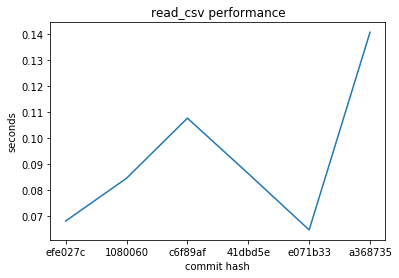

In [5]:
#RUN
other = json_parser(data)
plot_function_perf(other, 'read_csv')

['a368735', 'master']
[0.14083585953339933, 0.0698080029037288]


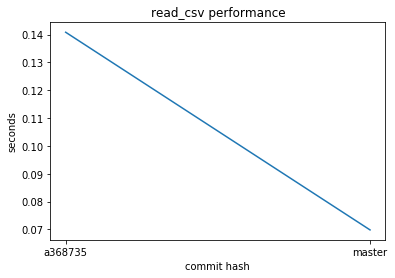

In [6]:
hash_to_compare = 'a368735324669914efcd9020ac3c8ffffab9b641'
master = json_parser(master_data)
plot_against_master(other, master, hash_to_compare, 'read_csv')